## What this animation shows

For each step:

• historical data
• model fit up to time t
• next-step prediction
• rolling forward

This gives intuition for:

“ARIMA learns temporal structure and updates predictions over time.”

✅ ARIMA ANIMATION (WORKING & SIMPLE)

In [1]:
! pip install statsmodels


c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

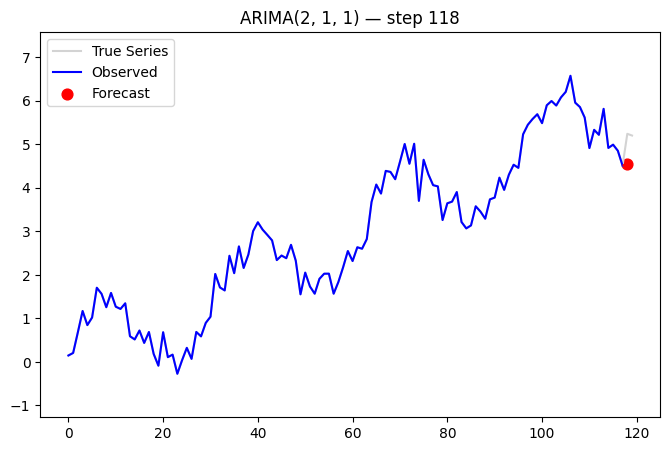

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from statsmodels.tsa.arima.model import ARIMA

# -----------------------------------
# Create output folder
# -----------------------------------
os.makedirs("gifs", exist_ok=True)

# -----------------------------------
# Generate time series
# -----------------------------------
np.random.seed(42)
n = 120
t = np.arange(n)

series = (
    0.05 * t +
    np.sin(0.2 * t) +
    np.random.normal(0, 0.3, size=n)
)

# -----------------------------------
# ARIMA configuration
# -----------------------------------
order = (2, 1, 1)
start_train = 20

# -----------------------------------
# Plot setup
# -----------------------------------
fig, ax = plt.subplots(figsize=(8, 5))
writer = PillowWriter(fps=2)

# -----------------------------------
# Animation
# -----------------------------------
with writer.saving(fig, "gifs/arima_forecasting.gif", dpi=120):

    for i in range(start_train, n - 1):
        ax.clear()

        train = series[:i]
        test_index = i

        model = ARIMA(train, order=order)
        fit = model.fit()

        forecast = fit.forecast(steps=1)

        # Plot history
        ax.plot(series, color="lightgray", label="True Series")
        ax.plot(range(i), train, color="blue", label="Observed")

        # Forecast point
        ax.scatter(test_index, forecast[0], color="red", s=60, label="Forecast")

        # Line showing prediction jump
        ax.plot([i - 1, i], [train[-1], forecast[0]], "r--")

        ax.set_title(f"ARIMA{order} — step {i}")
        ax.legend(loc="upper left")
        ax.set_ylim(series.min() - 1, series.max() + 1)

        writer.grab_frame()

plt.show()
